<a href="https://colab.research.google.com/github/samhuairen/Deeplearning-with-python/blob/main/Chatper4_%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%85%A5%E9%97%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 代码清单 4-1 加载IMDB数据集
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)
# num_words 是保留训练数据中前10000个最常出现的单词

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
#len(train_data[100]) 每条评论是是每个单词在常用的10000个单词中的索引，每个评论的长度各不相同，
train_labels[2]


0

In [ ]:
max([max(sequence) for sequence in train_data]) # 最大的索引不会超过10000

In [4]:
# 代码清单 4-2 将评论解码为文本
word_index = imdb.get_word_index () # 这个是一个将88585个单词按照出现的频率进行排序后，建立一个索引，索引从1开始的一个字典，每个唯一的单词都对应一个索引
reverse_word_index = dict([ (value, key) for(key, value) in word_index.items()])
decoded_view = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]]
)


1641221/1641221 [==============================] - 1s 0us/step


 train_data 中的每一个评论的单词都是来自上面字典中的索引，为了还原这个评论，我们首先将原来的字典按照（索引：单词）的顺序进行重新排布，然后根据我们评论里的序列去找这个反向字典里的索引，从而找到对应的字。然后组合起来就是评论，索引找不到的字，用？表示

4.1.2 准备数据
这部分是准备输入神经网络的数据，输入神经网络的数据是大小相同的张量，前面我们初步得到的训练数据只是把每个评论根据单词以及由单词字典生成了一个数字列表，这列表的长度都不相同，因此无法直接输入神经网络。这种情况下，要对数据做处理：一种是填充列表，使其长度相等，再将列表转化成形状为（samples，max_length）的整数张量，然后在模型的第一层用处理整数张量的层，也就是Embedding层。
第二种办法是进行multi-hot编码，将其转化成0和1组成的向量。举个例子，将序列[8,5]转化成1000维向量，只有索引8和索引5对应的数字是1，其他的位置处对应的数字是0，然后模型的第一层可以用Dense层，它能够处理浮点数的向量数据



In [6]:
#代码清单 4-3 用multi-bot 对整数序列进行编码
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(train_data[0])
# 虽然在上面的一个文本序列中有很多重复的数字，但是在矩阵当中的同一位置被多次覆盖为1，这个是可以的，矩阵中同一位置多次设定1和出现一次都是一样的

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_lables).astype("float32")

构建模型，对于二元分类来说， 输入的是序列，标签是1或者0，这种是一类非常简单的分类，采用带有relu激活函数的Dense层就可以简单的堆叠连接。对于Dense层来说，结构需要注意以下几点：
1. 神经网络有多少层
2. 每层有多少个单元
在本例中，我们设定2层，每层16个神经单元，第三层给出一个标量预测值，代表的是当前评论的情感分析
              输入文本（向量化文本）
              Dense（units=16）
              Dense（units=16）
              Dense（units=1）
                  输出概率值

In [8]:
# 代码清单 4-4 模型定义
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [14]:
# 代码清单 4-5 模型编译
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
# 代码清单 4-6 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
#代码清单 4-7 训练模型
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.0096 - accuracy: 0.9996 - val_loss: 0.7327 - val_accuracy: 0.8561
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0095 - accuracy: 0.9993 - val_loss: 0.6178 - val_accuracy: 0.8641
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0116 - accuracy: 0.9979 - val_loss: 0.6457 - val_accuracy: 0.8691
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0052 - accuracy: 0.9999 - val_loss: 0.6506 - val_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0079 - accuracy: 0.9988 - val_loss: 0.6711 - val_accuracy: 0.8696
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.7073 - val_accuracy: 0.8643
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.7114 - val_accuracy: 0.8690
Epoch 8/20
30

In [ ]:
history_dict = history.history
print(history_dict)

In [22]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

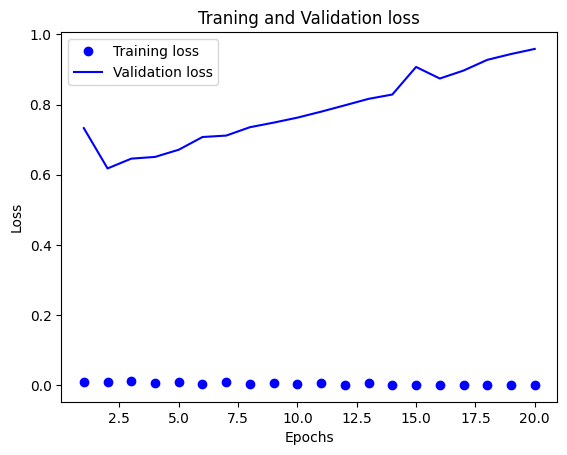

In [23]:
# 4-8 绘制训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values,'bo', label='Training loss')
plt.plot(epochs,val_loss_values,'b', label='Validation loss')
plt.title('Traning and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

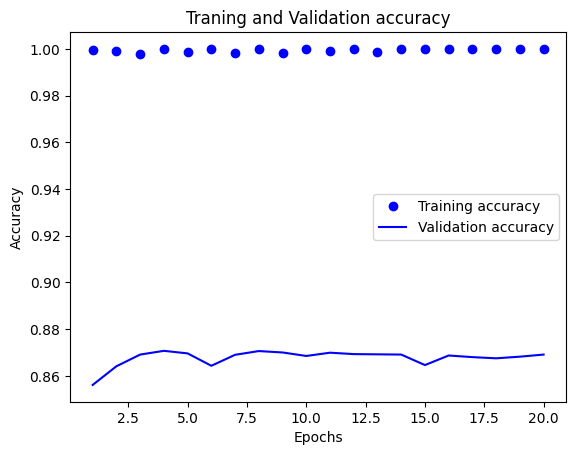

In [24]:
# 4-9 绘制训练精度和验证精度
# plt.clf() 清空图像
import matplotlib.pyplot as plt
history_dict = history.history
acc  = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc,'bo', label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='Validation accuracy')
plt.title('Traning and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#代码清单 4-10 从头开始训练一个模型
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results) # 输出测试损失和测序精度



Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4520 - accuracy: 0.8152
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2652 - accuracy: 0.9038
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2100 - accuracy: 0.9232
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3191 - accuracy: 0.8727
[0.3190682530403137, 0.8726800084114075]


In [10]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.12452588],
       [0.9990468 ],
       [0.33084652],
       ...,
       [0.07448667],
       [0.02853984],
       [0.48240352]], dtype=float32)

1. 通常要对原始数据进行大量的预处理，使得它能够满足输入神经网络，一般最后生成张量
2. 带有relu激活函数的Dense堆叠层可以解决很多问题，包括情感分析
3. 对于二元分类模型，最后一层输出的是一个0到1 的标量，表示的是概率值
4. 对于二元分类模型，最后一层的激活函数是sigmoid，应该是使用binary_crossentropy 损失函数
5. 优化器一般选择rmsprop 即可
6. 神经网络在训练数据上表型的越来越好，不代表在未见过的数据上表现的很好，通过这种在训练数据上表型的好，但是未见过的数据上表现的不好的现象叫做过度拟合，所以一般有用监控数据来进行训练集之外的监控

**4.2 新闻分类：多分类问题示例**
多分类问题是有多个分类，我们的目的是将测试数据根据我们训练数据的目标进行分类，这些分类通常是多个，且每个分类是互斥的，也就是是说一个样本只能对应一个分类，这种一般叫做多标签，多分类。比如路透社的示例数据，每个新闻对应46个分类中的一个。总共有46个分类。

In [1]:
# 代码清单 4-11， 加载路透社数据集
from tensorflow.keras.datasets import reuters
(train_data, train_label),(test_data, test_label) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))

2110848/2110848 [==============================] - 0s 0us/step
8982
2246


In [2]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [3]:
# 代码清单 4-12将新闻解码为文本
words_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in words_index.items()]
)
decoded_newswire = " ".join(
   [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
print(train_label[10])

3


In [39]:
# 4.2.2 准备数据
# 代码清单 4- 13 编码输入数据
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [44]:
print(x_train.shape)
print(y_train.shape)

(8982, 10000)
(8982, 46)


标签向量化， 标签就是对应的目标值，在二元分类问题中，一个分类是0，一个是1，整个标签数组是有0和1构成的向量，我们用numpy.asarray(train_label).astype('float32')进行转换就可以了。对于多分类的标签，通常转化为一个整数张量，或者用one-bot编码，就是一个0，1编码，长度是分类的个数，比如路透社的分类是46，每个标签是长度为46的向量，在特定的分类上编码为1，其他的分类上为0。所有样本的标签存储为一个样本数目为行，分类数目为列的矩阵。

In [45]:
# 代码清单 4-14 编码标签
def to_one_bot(labels, demension=46):
  results = np.zeros((len(labels),demension))
  for i, label in enumerate(labels):
    results[i,label]=1
  return results

y_train = to_one_bot(train_label)
y_test = to_one_bot(test_label)

In [14]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
train_label[9]

16

In [17]:
train_label[0:11]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16,  3])

In [46]:
# keras 又一个内置的方法可以实现这边编码
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)


In [48]:
print(y_train.shape)

(8982, 46)


In [25]:
y_train[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
# 代码清单 模型定义
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46, activation='softmax')
])


In [32]:
# 代码清单 编译模型
model.compile(
    loss ='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [49]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val= y_train[:1000]
partial_y_train = y_train[1000:]


In [50]:
print(partial_x_train.shape)
print(partial_y_train.shape)

(7982, 10000)
(7982, 46)


In [51]:
# 代码清单 4-18 训练模型
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data =(x_val, y_val)
)


Epoch 1/20
16/16 [==============================] - 2s 40ms/step - loss: 2.7644 - accuracy: 0.5168 - val_loss: 1.8751 - val_accuracy: 0.6080
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5719 - accuracy: 0.6805 - val_loss: 1.3789 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1983 - accuracy: 0.7412 - val_loss: 1.2030 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9867 - accuracy: 0.7879 - val_loss: 1.1010 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8305 - accuracy: 0.8220 - val_loss: 1.0296 - val_accuracy: 0.7690
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7020 - accuracy: 0.8495 - val_loss: 0.9679 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5940 - accuracy: 0.8731 - val_loss: 0.9230 - val_accuracy: 0.8060
Epoch 8/20
16

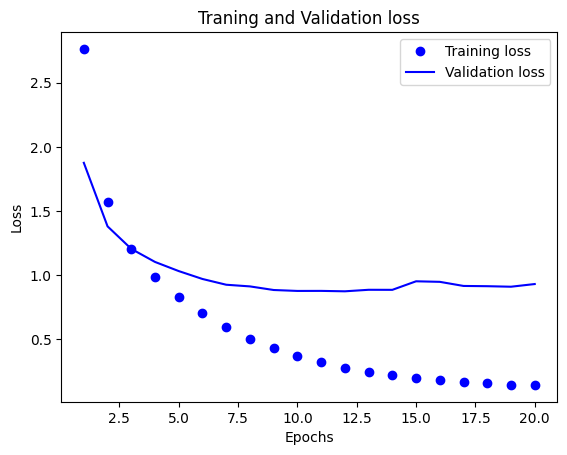

In [52]:
# 代码清单4-19 绘制训练损失和验证损失
import matplotlib.pyplot as plt
loss  = history.history['loss']
val_loss  = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Traning and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

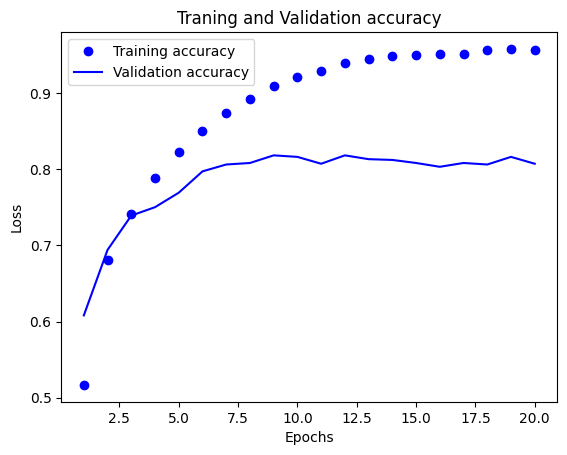

In [53]:
# 代码清单4-20 绘制训练精度和验证精度
import matplotlib.pyplot as plt
acc  = history.history['accuracy']
val_acc  = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc,'bo', label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='Validation accuracy')
plt.title('Traning and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

从上图可以看出，数据在训练9轮之后就可以过度拟合，因此我们重新构建一个模型，在9轮之后就停止训练

In [54]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(
    loss ='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512,
)
results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/9
18/18 [==============================] - 1s 19ms/step - loss: 2.6651 - accuracy: 0.5223
Epoch 2/9
18/18 [==============================] - 0s 18ms/step - loss: 1.4906 - accuracy: 0.6758
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.1393 - accuracy: 0.7501
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9296 - accuracy: 0.7985
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7738 - accuracy: 0.8353
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6481 - accuracy: 0.8619
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5462 - accuracy: 0.8821
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4579 - accuracy: 0.9020
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9607 - accuracy: 0.7787
[0.9606585502624512, 0.7787176966667175]


上面我们是根据验证集确认模型在训练9轮之后就会出现过度拟合，因此我们可以根据验证集的损失和精确度来判读什么时候就会出现过度拟合，这样就来确定最终模型的精确度和损失了。

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

In [ ]:
# 对新数据进行预测
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])


In [ ]:
# 处理标签的另一种方法，将其转化为整数张量
y_train = np.array(train_labels)
y_test = np.aaray(test_labels)
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 对于整数向量，损失函数用系数分类交叉熵


In [ ]:
# 代码清单 4-22 具有信息瓶颈的模型
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),     # 第二层层数很少，我们试图将大量信息压缩到维度较小的中间层。模型能够将大部分比呀信息塞进这个4维的表示中，但不是全部信息
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


小结：

如果对N个类别的数据点进行分类，那么模型最后一层应该是大小为N的Dense层

对于单标签，多分类问题，模型的最后一层应该使用softmax激活函数，这样可以输出一个N个输出类别的概率分布

对于这种分类问题，损失函数几乎是分类交叉熵，它将模型输出的概率分布于目标的真实分布之间的距离最小化

处理多分类问题的标签有两种方法

（1） 通过分类编码one-bot编码，使用categorial_crossentropy 损失函数

（2） 使用整张整数向量，使用sparse_categorial_crossentropy 损失函数

如果需要将数据划分到多分类层，应该尽量避免使用太小的中间层，以免在模型中造成信息瓶颈


4.3 回归问题预测


In [15]:
# 代码清单 4-23 加载波士顿房间数据集
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets) = (boston_housing.load_data())

In [23]:

print(train_targets.shape)
print(test_targets.shape)


(404,)
(102,)


In [17]:
# 代码清单 4-24 数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /=std
# 对测试数据的标准化处理也是按照训练数据的平均数和标准差进行操作的，不能对测试集数据本身做任何的数据操作

In [20]:
# 代码清单 4-25 模型构建
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(
      optimizer='rmsprop',
      loss='mse',
      metrics=['mae']
  )
  return model

# loss mse损失函数，均方误差，mean squared error(MSE)
# 监控指标 mae 平均绝对误差 mean absolute error （MAE）预测值与目标值之间的绝对值

In [25]:
# 使用K折交叉验证方法
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]],
      axis=0)
  model = build_model()
  model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=16,
            verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

print(all_scores)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
[1.9820287227630615, 2.6515891551971436, 2.568222761154175, 2.4527571201324463]


In [26]:
# 代码清单 4-27 保存每折的验证分数

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_history = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples:(i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i+1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate([
      train_targets[:i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]],
      axis=0)
  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=16,
            verbose=0,
            validation_data=(val_data, val_targets))

  mae_history = history.history['mae']
  all_mae_history.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [29]:
len(all_mae_history)

4

In [30]:
# 代码清单 4-28 计算每轮的K折验证分数平均值
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]
print(average_mae_history)

[20.653293132781982, 17.195829391479492, 13.082198858261108, 8.894016027450562, 6.0074464082717896, 4.7660253047943115, 4.086762249469757, 3.634941875934601, 3.381275236606598, 3.182693898677826, 3.0250428915023804, 2.9378026127815247, 2.8036784529685974, 2.7295918464660645, 2.642891824245453, 2.56945937871933, 2.5140270590782166, 2.4705634713172913, 2.4076744318008423, 2.382467210292816, 2.377050995826721, 2.3298633694648743, 2.318909466266632, 2.252202868461609, 2.266533315181732, 2.230853497982025, 2.2173484563827515, 2.2061895728111267, 2.1834883093833923, 2.1555532217025757, 2.142568588256836, 2.1151188015937805, 2.1279359459877014, 2.0947128534317017, 2.101886570453644, 2.0739722847938538, 2.0400039851665497, 2.0465587079524994, 2.0386790931224823, 2.0383517742156982, 1.9963670074939728, 1.9947485029697418, 1.9769202768802643, 1.989524096250534, 1.9788185060024261, 1.9515251517295837, 1.950950562953949, 1.904654324054718, 1.9294926226139069, 1.913877546787262, 1.905143290758133, 

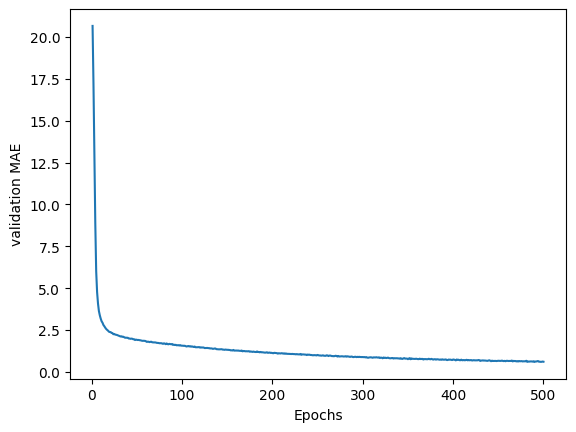

In [32]:
# 代码清单 4-29 绘制MAE曲线
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()


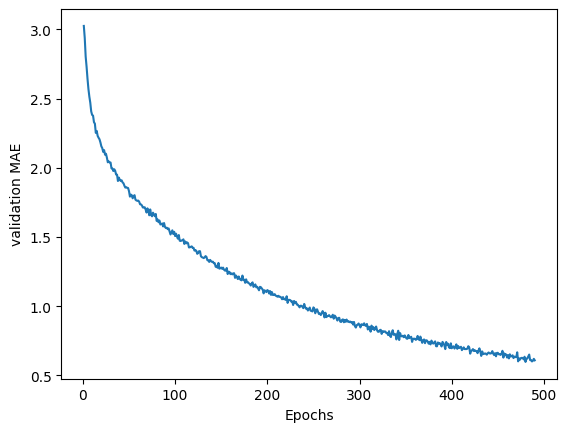

In [34]:
# 绘制验证曲线， 剔除前10个数据点
tractated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(tractated_mae_history)+1), tractated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()


In [ ]:
# 最终代码
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16)


In [36]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
predictions = model.predict(test_data) # 对测试数据进行预测
predictions[0] # 测试数据的第一个房子的价格

4/4 [==============================] - 0s 3ms/step


array([8.577125], dtype=float32)

小结：

输入数据进行数据处理，必须要注意的是对测试数据的处理是基于预测数据的，不能在原来的测试数据上做处理

对于回归问题，应该需要注意是的是模型的最后一层只要一层，不需要激活函数

模型的损失是mse 均方误差，模型的监控指标是mae 平均绝对误差

要尽量使用K值交叉验证方法，尤其是数据较少的情况下，对测试数据进行进行交叉验证的情况下，可以对每个K进行多次的单独训练，然后看这些训练次数对于的K值的平均误差的平均值，进而看模型在进行多少轮训练的时候出现过度拟合现象。最后再根据过度拟合出现的轮数，确定一个最终的模型。这个时候就不需要验证集了。K值交叉验证的时候，每次选择一定的样本作为预测集，剩下的样本作为验证集。验证集只是计算评价指标的，不进行训练。
K值交叉验证是针对数据较少的情况下进行的
